# Importing necessary libraries and downloading necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# model training
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparing the Data

##Loading the Expected Personality Requirement

In [ ]:
# connecting to google drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Intellihire

Mounted at /content/drive
/content/drive/MyDrive/Intellihire


In [ ]:
# # Load the CSV file into a Pandas DataFrame

df = pd.read_csv('Personality_Requirements.csv')

In [ ]:
# df = pd.DataFrame({
#     'Position of Interest': 'Associate Software Engineer',
#     'Innovative': [5],
#     'Fast learner': [4],
#     'Organization skills': [3],
#     'Attention to detail': [4],
#     'Assertiveness':  [2],
#     'Leadership skills':  [2],
#     'Team Player':  [5],
#     'Communication skills':  [3],
#     'Confidence':  [3],
#     'Adaptability to changes':  [4]
# })

In [ ]:
# print the data  without the first column

# data = (df.iloc[:, 1:])
data = (df.iloc[0, 1:])
print(data)

Innovative                 5
Fast learner               4
Organization skills        3
Attention to detail        4
Assertiveness              2
Leadership skills          2
Team Player                5
Communication skills       3
Confidence                 3
Adaptability to changes    4
Name: 0, dtype: object


##Mapping the Expected Personality Requirements with the Big Five Traits

In [ ]:
# OPENNESS:
# Fast learner
# Innovative

# CONCIENTIOUSSNESS:
# Attention to Detail
# Organization skills

# EXTRAVERSION:
# Communication skills
# Team Player

# AGREEABLENESS:
# Interpersonal Skills
# Analytical and Problem Solving Skills

# NEUROTICISM:
# Adaptability to changes
# Confidence

In [ ]:
# create an empty dataframe to hold the final expected values for the Big Five traits
expected = pd.DataFrame()

In [ ]:
# Map the personality requirements with Big Five Traits

expected['openness'] = [(data['Fast learner'] + data['Innovative'])/2]
expected['conscientiousness'] = [(data['Attention to detail'] + data['Organization skills'])/2]
expected['extraversion'] = [(data['Assertiveness'] + data['Leadership skills'])/2]
expected['agreeableness'] = [(data['Team Player'] + data['Communication skills'])/2]

# expected (anti-)neuroticism score
expected['neuroticism'] = [(data['Confidence'] + data['Adaptability to changes'])/2]

# Show the updated DataFrame
print(expected)

   openness  conscientiousness  extraversion  agreeableness  neuroticism
0       4.5                3.5           2.0            4.0          3.5


##Loading the Candidate Personality

In [ ]:
# EXTRAVERSION
# 1. I prefer working as a team
# 2. I feel comfortable around people.
# 3. I find it easy to strike up a conversation with strangers.
# 4. I don't mind being the center of attention.
# 5. I prefer spending time with friends and engaging in social activities rather than being alone.

# NEUROTICISM
# 6. I often feel insecure or self-conscious about myself
# 7. My mood changes a lot throughout the day.
# 8. I often tend to worry about little things.
# 9.  I often feel anxious or worried about the future.
# 10.  I often feel tense or nervous in new or unfamiliar situations.

# AGREEABLENESS
# 11. I am interested in people and their opinions.
# 12. I am willing to compromise and accommodate others' viewpoints.
# 13. I sympathize with others' feelings.
# 14. I find it difficult to say "no" when people ask for my help or assistance.
# 15. I am understanding and forgiving of people's mistakes and shortcomings.

# CONSCIENTIOUSNESS
# 16. I am always prepared.
# 17. I pay attention to details.
# 18. I always make plans and follow through with them.
# 19. I set high standards for myself and strive to meet them.
# 20. I am a self-disciplined person, even when faced with distractions.

# OPENNESS
# 21. To what extent do you enjoy exploring new ideas and concepts, even if they challenge your current beliefs?
# 22. I often daydream and have an active imagination.
# 23. How often do you find yourself drawn to unique and unconventional ideas or approaches?
# 24. How willing are you to take risks in trying new things or exploring different paths in life?
# 25. I am willing to adapt to change and embrace new opportunities.

In [ ]:
# Load the CSV file containing candidate score for mcq questions
mcq_scores = pd.read_csv('mcq_scores.csv')
mcq_scores

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,2.6,2.4,4.4,4.4,4.0


In [ ]:
# Load the CSV file containing candidate score for open-ended questions
open_ended_scores = pd.read_csv('candidate_scores.csv')
open_ended_scores

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,2.857143,2.5,1.666667,3.5,1.666667


In [ ]:
# Combining the 2 scores to get a final score for the candidate's Big Five Traits
candidate_scores = pd.DataFrame()
candidate_scores['openness'] = ((mcq_scores['openness']*(40/100)) + (open_ended_scores['openness'])*(60/100))
candidate_scores['conscientiousness'] = ((mcq_scores['conscientiousness']*(40/100)) + (open_ended_scores['conscientiousness'])*(60/100))
candidate_scores['extraversion'] = ((mcq_scores['extraversion']*(40/100)) + (open_ended_scores['extraversion'])*(60/100))
candidate_scores['agreeableness'] = ((mcq_scores['agreeableness']*(40/100)) + (open_ended_scores['agreeableness'])*(60/100))

candidate_scores['neuroticism'] = ((mcq_scores['neuroticism']*(40/100)) + (open_ended_scores['neuroticism'])*(60/100))
candidate_scores['neuroticism'] = 5 - candidate_scores['neuroticism']

In [ ]:
candidate_scores

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,3.314286,3.26,2.04,3.86,3.04


# Expected vs Candidate Traits

##Plotting the Expected Personality Traits

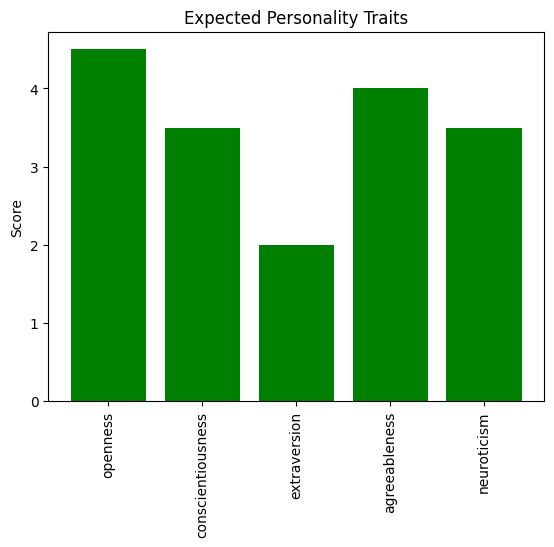

In [ ]:
# Create a vertical bar plot
plt.bar(x=expected.columns, height=expected.values[0], color='green')

# Set the y-axis label
plt.ylabel('Score')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Expected Personality Traits')

# Show the plot
plt.show()

##Plotting the Candididate Personality Traits

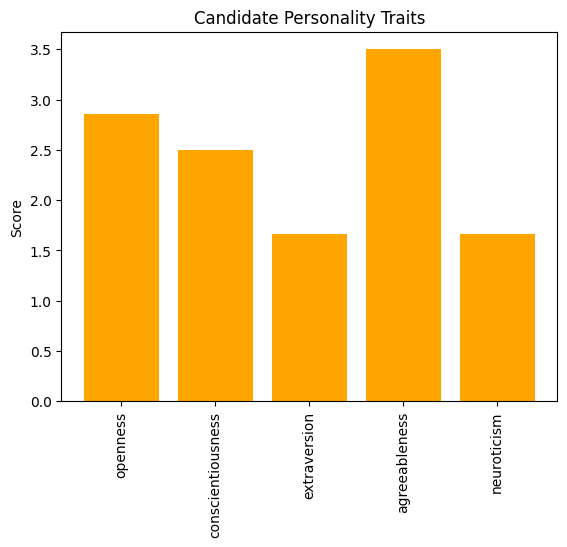

In [ ]:
# Create a vertical bar plot
plt.bar(x=open_ended_scores.columns, height=open_ended_scores.values[0], color='orange')

# Set the y-axis label
plt.ylabel('Score')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Candidate Personality Traits')

# Show the plot
plt.show()

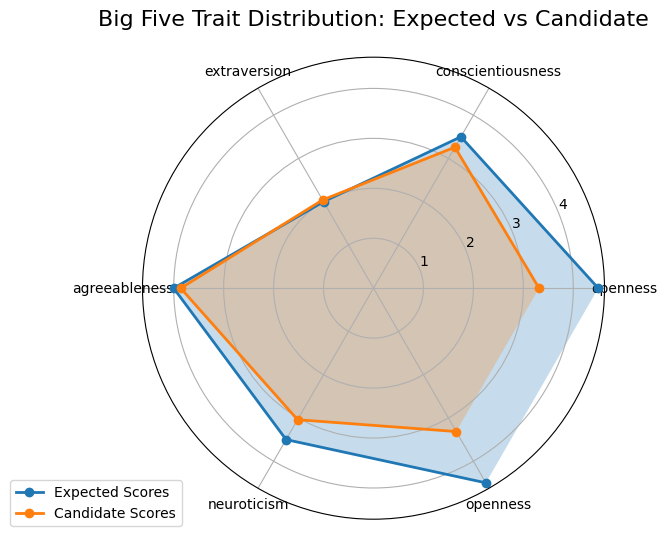

In [ ]:
# Create a list of column names for the data frames
columns = list(expected.columns)

# Add the first column name to the end of the list to create a closed loop for the radar chart
columns.append(columns[0])

# Get the values of the data frames as arrays
values1 = np.array(expected.iloc[0])
values2 = np.array(candidate_scores.iloc[0])

# Add the first value to the end of the array to create a closed loop for the radar chart
values1 = np.append(values1, values1[0])
values2 = np.append(values2, values2[0])

# Set the angle values for the radar chart
angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False)

# Create a radar chart for the first data frame
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values1, 'o-', linewidth=2, label="Expected Scores")
ax.fill(angles, values1, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, columns)
ax.set_title("Big Five Trait Distribution: Expected vs Candidate\n", fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.grid(True)

# Create a radar chart for the second data frame
ax.plot(angles, values2, 'o-', linewidth=2, label="Candidate Scores")
ax.fill(angles, values2, alpha=0.25)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.show()


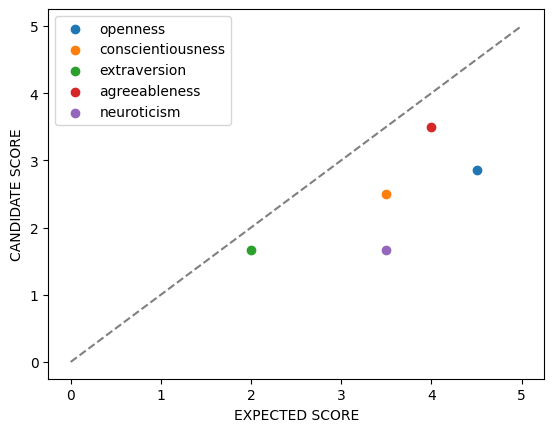

In [ ]:
import matplotlib.pyplot as plt

# Extract the column names from the data frames
columns = open_ended_scores.columns

# Create a scatter plot for each column
for col in columns:
    plt.scatter(expected[col], open_ended_scores[col], label=col)

# Add a horizontal line at the middle of the plot
plt.plot([0, 5], [0, 5], linestyle='--', color='grey')

# Add labels and legend
plt.xlabel('EXPECTED SCORE')
plt.ylabel('CANDIDATE SCORE')
plt.legend()

# Display the plot
plt.show()


# Supervised Learning Models to Predict Personality Cluster

In [ ]:
# load the dataset created from K-means model
clusters_df = pd.read_csv('Personality_clusters.csv')

In [ ]:
clusters_df

,openness,conscientiousness,extraversion,agreeableness,neuroticism,cluster
0,3.3,3.2,3.0,3.1,2.4,3
1,2.7,3.1,3.4,3.2,2.1,3
2,3.1,2.8,2.9,2.8,2.6,3
3,3.1,2.7,2.6,3.2,2.7,2
4,3.6,3.2,3.5,3.0,2.3,3
...,...,...,...,...,...,...
1013476,2.9,3.1,3.2,3.6,3.3,2
1013477,3.3,2.8,3.4,3.3,4.0,1
1013478,3.6,3.3,3.3,3.5,2.7,0
1013479,3.5,3.0,2.8,3.1,3.3,2


##Splitting Data into Training and Testing

In [ ]:
X = clusters_df[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']]
y = clusters_df['cluster']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##RandomForest Model

In [ ]:
# # Instantiate the Random Forest Classifier
# rf_classifier = RandomForestClassifier()

# # Fit the model to the training data
# rf_classifier.fit(X_train, y_train)

# # Predict cluster labels for the test data
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict cluster labels for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='macro')
rf_recall = recall_score(y_test, y_pred, average='macro')
rf_f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Accuracy: 0.9915144279392394
Precision: 0.9925666944188214
Recall: 0.9921722228295868
F1 Score: 0.9923681190314955


**Accuracy is too high - Overfitting**

## XGBoost Model

In [ ]:
# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_classes = len(clusters_df['cluster'].unique())

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'seed': 42
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain)

# Predict cluster labels for the test data
y_pred = xgb_model.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Calculate evaluation metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average='macro')
xgb_recall = recall_score(y_test, y_pred, average='macro')
xgb_f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Accuracy: 0.9546811250289842
Precision: 0.9624612093453747
Recall: 0.962288670998823
F1 Score: 0.9622851701981483


##Naive-Bayes

In [ ]:
# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

# Predict cluster labels for the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='macro')
nb_recall = recall_score(y_test, y_pred, average='macro')
nb_f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Accuracy: 0.9566545138803239
Precision: 0.9577250172499674
Recall: 0.9652682832652996
F1 Score: 0.9613905637453467


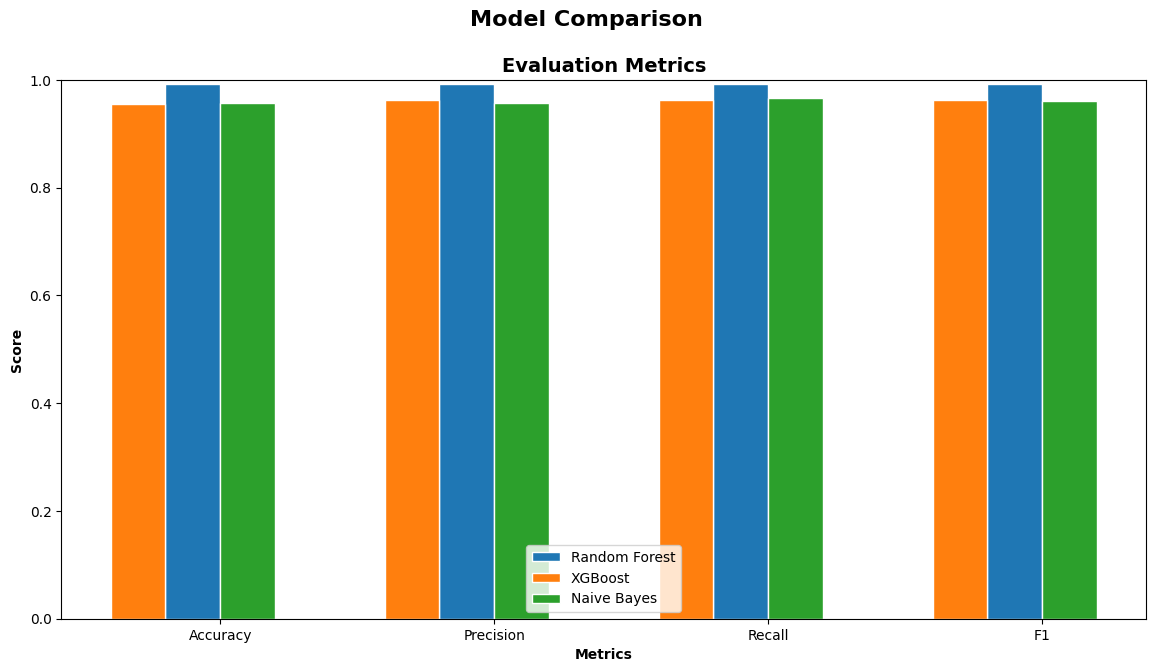

In [ ]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## set bar size
barWidth = 0.2
rf_score = [rf_accuracy, rf_precision, rf_recall, rf_f1]
xgb_score = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
nb_score = [nb_accuracy, nb_precision, nb_recall, nb_f1]

## Set position of bar on x axis
r1 = np.arange(len(xgb_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r1, xgb_score, width=barWidth, edgecolor='white', label='XGBoost')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(xgb_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

##Save the Cross Validated XGBoost model

In [ ]:
# Save the trained model to a pickle file
filename = 'xgboost_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)


##Predict the Personality Clusters

##Load the saved XGBoost model

In [ ]:
# Load the saved XGBoost model from the pickle file
filename = 'xgboost_model.pkl'
with open(filename, 'rb') as file:
    xgb_model = pickle.load(file)

In [ ]:
# predict the personality cluster for Candidate's personality

# Convert the candidate_scores DataFrame to DMatrix format
dnew = xgb.DMatrix(candidate_scores)

# Make predictions using the XGBoost model
predictions = xgb_model.predict(dnew)

print("Candidate Personality Cluster:", predictions)

ValueError: ignored

In [ ]:
# predict the personality cluster for Candidate's personality

# Convert the candidate_scores DataFrame to DMatrix format
dnew = xgb.DMatrix(expected)

# Make predictions using the XGBoost model
predictions = xgb_model.predict(dnew)

print("Candidate Personality Cluster:", predictions)

# Score for Expected vs Candidate Traits

In [ ]:
# Score = ((OE/OC + CC/CE + EC/EE + AC/AE + NC/NE)/5)*100

In [ ]:
# Add a new column with the sum of 'Fast learner' and 'Innovative'

O = candidate_scores['openness']/expected['openness']
C = candidate_scores['conscientiousness']/expected['conscientiousness']
E = candidate_scores['extraversion']/expected['extraversion']
A = candidate_scores['agreeableness']/expected['agreeableness']
N = candidate_scores['neuroticism']/expected['neuroticism']

print('O: ', O)
print('C: ', C)
print('E: ', E)
print('A', A)
print('N', N)

score = ((O + C + E + A + N)/5)*100

# Show the updated DataFrame
print('\n')
print('Candidate personality score: ', score)

O:  0    0.736508
Name: openness, dtype: float64
C:  0    0.931429
Name: conscientiousness, dtype: float64
E:  0    1.02
Name: extraversion, dtype: float64
A 0    0.965
Name: agreeableness, dtype: float64
N 0    0.868571
Name: neuroticism, dtype: float64


Candidate personality score:  0    90.430159
dtype: float64
